Andrea Lizeth Lopez-Rodriguez

# Daily QC  Radionuclide Calibrator (Dose Calibrator) in NM

Data: January 2018 to November 2019. Inicialmente se importan los paquetes de Python que serán empleados en el análisis de los datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Paquete de tiempo
import datetime

%matplotlib inline

#Para cargar los datos

###Activimetro CRC 25 PET con fuente Cs-137
#data = pd.read_csv('ActPET.txt', delim_whitespace =True)

###Activimetro 55tR con fuente Co-57
data = pd.read_csv('ActSPECT.txt', delim_whitespace =True)

#para ver los primeros datos
data.head()

,Number,Fecha,AjustemV,Fondo,Voltaje,Actividad,Desviacion
0,1,01/02/18,0.02,0.34,155.3,748.0,-2.1
1,2,01/03/18,0.02,0.30,155.3,747.0,-2.0
2,3,01/04/18,0.02,0.30,155.3,747.0,-1.7
3,4,01/05/18,0.02,0.36,155.3,746.0,-1.6
4,5,01/09/18,0.02,0.36,155.3,747.0,-1.7


In [2]:
#data.describe(include="all")
data['Actividad'].describe()

count    439.000000
mean     352.553531
std      177.048141
min      128.000000
25%      200.600000
50%      306.000000
75%      472.000000
max      748.000000
Name: Actividad, dtype: float64

## Fuentes Chequeo MN

In [3]:
### Fuentes de Chequeo en Medicina Nuclear 

##############################
########   Co 57  ###########

#Fecha de referencia
# primero de noviembre de 2015
Co='01/11/2015'
Co57= datetime.datetime.strptime(Co,'%d/%m/%Y')
#Actividad en mCi
AcCo= 5.774
### half life [días]
HLCo= 271.74
### Lambda
Lambdaco= np.log(2)/HLCo


##############################
########   Cs 137  ###########

#Fecha de referencia
# primero de noviembre de 2015
Cs='01/11/2015'
Cs137= datetime.datetime.strptime(Cs,'%d/%m/%Y')
#Actividad en uCi
AcCs= 214.9
### half life  [días]
HLCs= 30.08*365
### Lambda
Lambdacs= np.log(2)/HLCs

## Amplifier offset 

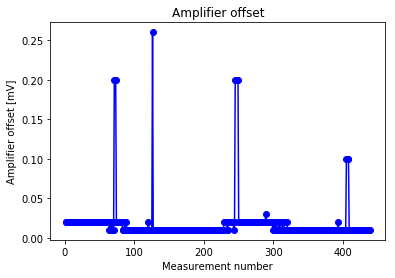

In [4]:
Medida=data['Number']
Ajuste=data['AjustemV']
plt.ylabel('Amplifier offset [mV]')
plt.xlabel('Measurement number')
#plt.grid(False)
plt.title('Amplifier offset')
plt.plot(Medida,Ajuste,'ob-')
#plt.savefig('SPECTajuste.pdf')

## Background

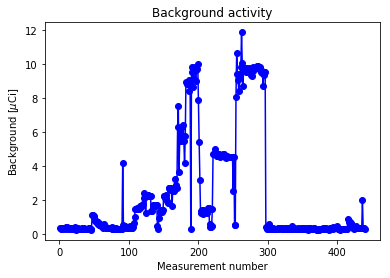

In [5]:
Medida=data['Number']
background=data['Fondo']
plt.ylabel('Background [$\mu$Ci]')
plt.xlabel('Measurement number')
plt.title('Background activity')
plt.plot(Medida,background,'ob-')
#plt.savefig('SPECTfondo.pdf')

## Check Source Accuracy,  % desviación

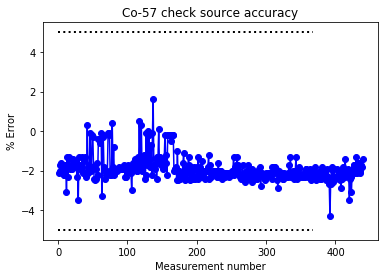

In [6]:
Medida=data['Number']
Error=data['Desviacion']
plt.ylabel('% Error')
plt.xlabel('Measurement number')
plt.title('Co-57 check source accuracy')
plt.plot(Medida,Error,'bo-')
plt.plot((0, 368),(5,5), 'k:', linewidth=2) 
plt.plot((0, 368),(-5,-5), 'k:', linewidth=2) 
#plt.savefig('SPECTaccuracy.pdf')

## HV Reading 

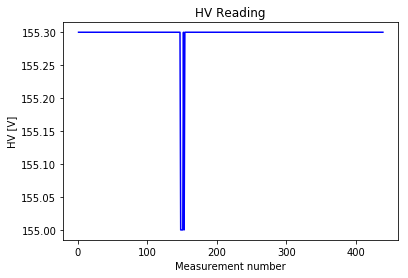

In [7]:
Medida=data['Number']
HV=data['Voltaje']
plt.ylabel('HV [V]')
plt.xlabel('Measurement number')
plt.title('HV Reading')
plt.plot(Medida,HV,'b-')
#plt.savefig('SPECTHV.pdf')

## Activimetro Inyección

### Practical Mathematics in Nuclear Medicine Technology, Patricia Wells

#### How to calculate the acceptable range of dose calibrator readings for a given source, Pag 102 

In [8]:
################# Elapsed time ###############

#data["Fecha"][0]

d = pd.to_datetime(data["Fecha"],format='%m/%d/%y')
###Cobalto 57
timeE=(d-Co57)

#test='01/02/18'
#date=datetime.datetime.strptime(test,'%m/%d/%y')
#c=(date-dateCo57).days


In [9]:
data['timeE']=timeE.dt.days.values

In [10]:
#data

In [11]:
############# Expected Activity ###########
#### Act =Act_oe^{-\lambda t}

###Cobalto 57
Actco=AcCo*np.exp(-Lambdaco*data["timeE"])*1000

In [12]:
data['EAct']=Actco

In [13]:
#data

In [14]:
############# Acceptable Range of dose calibrator readings ###########

### 10% ó 5%
X=data['EAct']*(0.05)


### Rango
Rmin=data['EAct']-X
Rmax=data['EAct']+X


In [15]:
### Ingresar datos en el data 
data['Rmin']=Rmin
data['Rmax']=Rmax

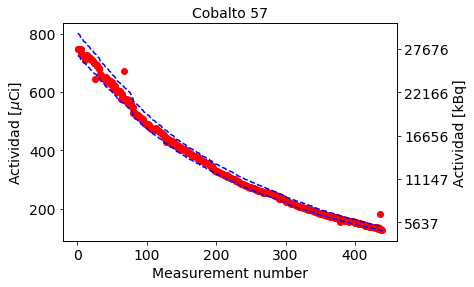

In [16]:
### Plot the data
ax1=plt.subplot(1,1,1)

ax1.plot(data['Number'],data['Actividad'],'or')
ax1.plot(data['Number'],data['Rmin'],'b--')
ax1.plot(data['Number'],data['Rmax'],'b--')


ax1.set_title('Cobalto 57',fontsize=14)
ax1.set_xlabel('Measurement number',fontsize=14)
ax1.set_ylabel('Actividad [$\mu$Ci]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)

## Set second y-axis for MBq
ax2 = ax1.twinx()
kBqs = np.linspace(data['Actividad'].min(),data['Actividad'].max()*37,6) # Actividad en MBq
ax2.set_yticks(kBqs/37) # Ponga los ticks
ax2.set_yticklabels(kBqs.astype(int)) # Ponga los Labels
ax2.yaxis.set_ticks_position('right') # set the position of the second x-axis to bottom
ax2.yaxis.set_label_position('right') # set the position of the second x-axis to bottom
ax2.spines['right'].set_position(('outward', 0))
ax2.set_ylabel('Actividad [kBq]',fontsize=14)
ax2.set_ylim(ax1.get_ylim())
ax2.tick_params(axis='y',labelsize=14)




#plt.legend()
#plt.title('TODOS')
#plt.ylabel('Actividad [$\mu$Ci]')
#plt.xlabel('Measurement number')

In [8]:
# import the visualization package: seaborn
import seaborn as sns

Text(0.5,0,'Theoretical Activity')

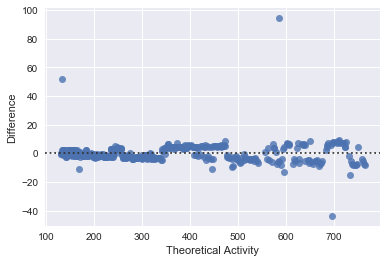

In [9]:

sns.residplot(data['ActividadmuC'], data['Actividad'])
plt.ylabel('Difference')
plt.xlabel('Theoretical Activity')


In [10]:
residuos=data['Actividad']-data['ActividadmuC']
data['residuos']= residuos

In [11]:
data['residuos'].describe()

count    439.000000
mean      -4.100248
std        7.059009
min      -50.821416
25%       -6.648378
50%       -3.882012
75%       -0.163635
max       88.142512
Name: residuos, dtype: float64

## Shewhart Chart

A Shewhart Chart uses the mean value of the data, and the standard deviation to plot certain limits:
-The upper and lower inf limits are $x\pm \sigma$
-The upper and lower warning limits are $x\pm 2\sigma$
-The upper and lower action limits are $x\pm 3\sigma$

Text(0.5,0,'Measurement number')

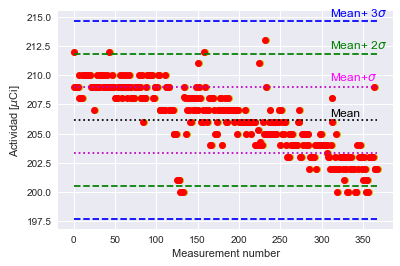

In [14]:

x= data['Number']
y=data['Actividad']
plt.plot(x,y,'oy')

meanAct=data['Actividad'].mean()
Stdeviacion=data['Actividad'].std()

###Mean
#plt.plot((0,368),(meanAct,meanAct),k:, )

xt= np.arange(0,368,1)
#Mean
y1= meanAct + (xt*0)
## 1 sigma
y2= meanAct+Stdeviacion+ (xt*0)
y3= meanAct-Stdeviacion+ (xt*0)
## 2 sigma
y4= meanAct- (2*Stdeviacion)+ (xt*0)
y5= meanAct+ (2*Stdeviacion)+ (xt*0)
## 3 sigma
y6= meanAct- (3*Stdeviacion)+ (xt*0)
y7= meanAct+ (3*Stdeviacion)+ (xt*0)

##The lines to plot
plt.plot(xt,y,'or')
plt.plot(xt,y1,'k:')
plt.plot(xt,y2,'m:')
plt.plot(xt,y3,'m:')
plt.plot(xt,y4,'g--')
plt.plot(xt,y5,'g--')
plt.plot(xt,y6,'b--')
plt.plot(xt,y7,'b--')


#Text in plot

plt.text(310,206.5,'Mean',color='black',size=12)
plt.text(310,209.5,'Mean+$\sigma$',color='magenta',size=12)
plt.text(310,212.3,'Mean+ 2$\sigma$',color='green',size=12)
plt.text(310,215,'Mean+ 3$\sigma$',color='blue',size=12)
#plt.fill_between(xt, y2,y3, color='dodgerblue', alpha='0.8')
#plt.fill_between(xt, y4,y5, color='dodgerblue', alpha='0.5')
#plt.fill_between(xt, y6,y7, color='lightskyblue', alpha='0.5')

plt.ylabel('Actividad [$\mu$Ci]')
plt.xlabel('Measurement number')

#plt.plot((0, 300),(206.8,206.8), 'k:', linewidth=2) 
## 1 sigma
#plt.plot((0, 300),(209.2,209.2), 'm:', linewidth=2)
#plt.plot((0, 300),(204.4,204.4), ':m', linewidth=2)
## 2 sigma
#plt.plot((0, 300),(202,202), 'g--', linewidth=2)
#plt.plot((0, 300),(211.6,211.6), 'g--', linewidth=2)
## 3 sigma
#plt.plot((0, 300),(199.6,199.6), 'b--', linewidth=2)
#plt.plot((0, 300),(214,214), 'b--', linewidth=2)
#plt.savefig('PETActividad.pdf')

### For a system in control

In [40]:
def count(datos,L,H):
    c=0
    for x in datos:
    #Condition check
        if x<L or x>H:
            c+=1
    return c 

In [41]:
### Information Limits
HIL= meanAct+Stdeviacion
LIL= meanAct-Stdeviacion
### Warning Limits
HWL= meanAct+(2*Stdeviacion)
LWL= meanAct-(2*Stdeviacion)
### Action Limits
HAL= meanAct+(3*Stdeviacion)
LAL= meanAct-(3*Stdeviacion)

In [46]:
### 1 in 3 outside, Information limits
data['Actividad'].count()/3

122.66666666666667

In [47]:
count(data['Actividad'],LIL,HIL)

171

In [48]:
### 1 in 20 outside, Warning limits
data['Actividad'].count()/20

18.399999999999999

In [49]:
count(data['Actividad'],LWL,HWL)

16

In [50]:
### 1 in 1000 outside, Action limits
data['Actividad'].count()/1000

0.36799999999999999

In [51]:
count(data['Actividad'],LAL,HAL)

0

Text(0.5,0,'Measurement number')

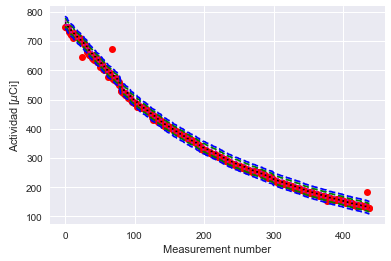

In [12]:

x= data['Number']
y=data['Actividad']
#plt.plot(x,y,'oy')

yteo=data['ActividadmuC']
Stdeviacion=data['residuos'].std()

xt= np.arange(0,439,1)
#Mean
y1= yteo+ (xt*0)
## 1 sigma
y2= yteo+Stdeviacion+ (xt*0)
y3= yteo-Stdeviacion+ (xt*0)
## 2 sigma
y4= yteo- (2*Stdeviacion)+ (xt*0)
y5= yteo+ (2*Stdeviacion)+ (xt*0)
## 3 sigma
y6= yteo- (3*Stdeviacion)+ (xt*0)
y7= yteo+ (3*Stdeviacion)+ (xt*0)

##The lines to plot
plt.plot(xt,y,'or')
plt.plot(xt,y1,'k:')
plt.plot(xt,y2,'m:')
plt.plot(xt,y3,'m:')
plt.plot(xt,y4,'g--')
plt.plot(xt,y5,'g--')
plt.plot(xt,y6,'b--')
plt.plot(xt,y7,'b--')


#Text in plot

#plt.text(310,206.5,'Mean',color='black',size=12)
#plt.text(310,209.5,'Mean+$\sigma$',color='magenta',size=12)
#plt.text(310,212.3,'Mean+ 2$\sigma$',color='green',size=12)
#plt.text(310,215,'Mean+ 3$\sigma$',color='blue',size=12)
#plt.fill_between(xt, y2,y3, color='dodgerblue', alpha='0.8')
#plt.fill_between(xt, y4,y5, color='dodgerblue', alpha='0.5')
#plt.fill_between(xt, y6,y7, color='lightskyblue', alpha='0.5')

plt.ylabel('Actividad [$\mu$Ci]')
plt.xlabel('Measurement number')
#plt.savefig('SPECTActividad.pdf'

## Cusum Chart

In [13]:
## Differences from mean
Diferencias=data['Actividad']-data['ActividadmuC']
data['Diferencias']= Diferencias

In [14]:
data['Diferencias'].describe()

count    439.000000
mean      -4.100248
std        7.059009
min      -50.821416
25%       -6.648378
50%       -3.882012
75%       -0.163635
max       88.142512
Name: Diferencias, dtype: float64

In [15]:
data['Diferencias']

0     -15.838978
1     -14.893080
2     -12.952140
3     -12.016145
4      -3.321357
5     -15.409896
6     -15.503305
7     -15.601570
8     -15.925386
9     -15.042957
10    -13.165323
11    -22.292472
12     -9.424393
13      0.151340
14     -2.999544
15     -3.155138
16     -0.315431
17     -0.480411
18     -0.003352
19      1.813041
20      0.624806
21      1.431955
22      0.234501
23      0.614633
24      0.398881
25    -50.821416
26     -0.046248
27     -1.275601
28      0.009319
29     -1.238009
         ...    
409    -0.093830
410    -0.018341
411     0.056191
412    -0.055195
413     0.014591
414    -3.216565
415    -4.148660
416    -3.450561
417    -3.086391
418    -3.023149
419    -4.960832
420    -4.999438
421    -3.020771
422    -2.963046
423    -2.806233
424    -2.950328
425    -2.395330
426     0.015643
427    -2.833858
428     0.015748
429    -0.035536
430     0.050466
431    -0.005237
432    -2.961818
433     0.080727
434     0.003133
435    49.980404
436    -2.2414

In [16]:
##A cumulative sum function
suma=np.cumsum(data['Diferencias'])
data['Suma']= suma

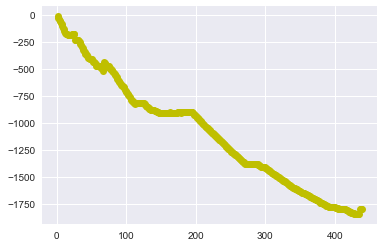

In [17]:
xc= data['Number']
yc=data['Suma']
plt.plot(xc,yc,'oy')

# Accuracy Testing

# Subsidiary Calibrations

Relate to containers and Volumes for which calibration factors are not supplied by the manufacturer (geometries and volumes)

# Repeatability testing 

If a measurement shows precision using the same procedure, operator, measuring system and location over a short period of time. Repeatability (Chamber and geometries)

# Lineality testing 